<a href="https://colab.research.google.com/github/georgef3/Visuals/blob/main/Choropleth_Success.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Set Up The Notebook

### 1.1 Load Packages
This page was built with significant help from the reference websites:

1. https://www.kaggle.com/dabaker/fancy-folium for heatmapping
2. https://github.com/bobhaffner/medium_posts/blob/master/folium_legend/folium_legend.ipynb for the text legend
3. http://qingkaikong.blogspot.com/2016/06/using-folium-6-layer-control-turn-onoff.html for heat map layer control
4. http://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/Plugins.ipynb for plugins


In [ ]:
import folium
import pandas as pd
import numpy as np

# 1.1 Set up the dataframe

In [ ]:
#Download the appropriate data

df_can = pd.read_excel('https://ibm.box.com/shared/static/lw190pt9zpy5bd1ptyg2aw15awomz9pu.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)
#df_can.head()


XLRDError: Unsupported format, or corrupt file: Expected BOF record; found b'  <!DOCT'

In [ ]:
df_can.to_csv("Choropleth State Data Dataframe", sep='\t')

In [ ]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

df_can.columns = list(map(str, df_can.columns))

df_can.set_index('Country', inplace=True)

df_can['Total'] = df_can.sum(axis=1) #axis = 1 sums accross columns

In [ ]:
# import matplot library to make the appropriate plots we are using the inline backend
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt


mpl.style.use(['tableau-colorblind10']) # optional: for ggplot-like style
print(plt.style.available)

['_classic_test', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10']


In [ ]:
#Get only the columns that we want
years = df_can.columns
years

Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')

In [ ]:
#Get only the years that we want and convert them to integers

years_selected = years[3:-1]

years_selected.astype(int)

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
            2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013],
           dtype='int64')

# 2. Create a Graph from the data to show trends over time

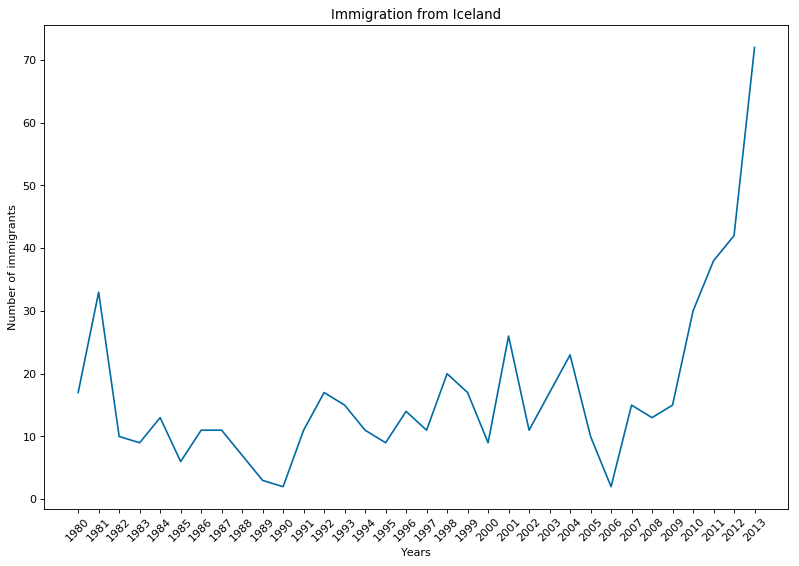

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

trend = df_can.loc['Iceland', years_selected]

plt.plot(years_selected, trend)
plt.title('Immigration from Iceland')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.xticks(rotation=45)
plt.show()




# 3. Create a waffle chart that illustrates proportions

In [ ]:
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]
# compute the proportion of each category with respect to the total
total_values = sum(df_dsn['Total'])
category_proportions = [(float(value) / total_values) for value in df_dsn['Total']]
# print out proportions
for i, proportion in enumerate(category_proportions):
    print (df_dsn.index.values[i] + ': ' + str(proportion))

Denmark: 0.32255663965602777
Norway: 0.1924094592359848
Sweden: 0.48503390110798744


In [ ]:
width = 20 # width of chart
height = 5 # height of chart

total_num_tiles = width * height # total number of tiles

print ('Total number of tiles is ', total_num_tiles)

Total number of tiles is  100


In [ ]:
# compute the number of tiles for each catagory
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

# print out number of tiles per category
for i, tiles in enumerate(tiles_per_category):
    print (df_dsn.index.values[i] + ': ' + str(tiles))

Denmark: 32
Norway: 19
Sweden: 49


In [ ]:
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width))

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1

        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index

print ('Waffle chart populated!')

Waffle chart populated!


<Figure size 432x288 with 0 Axes>

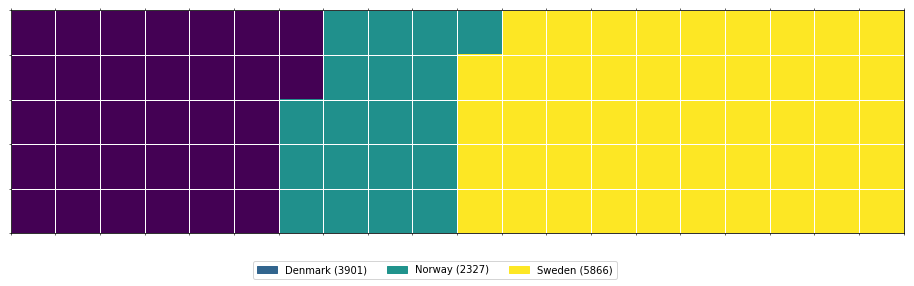

In [ ]:
import matplotlib.patches as mpatches

# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.viridis
plt.matshow(waffle_chart, cmap=colormap)
#plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=1)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum)-1]

# create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='upper center',
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )



In [ ]:
import folium
import wget
# define the world map centered around Canada with a low zoom level
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4)

# download countries geojson file
!wget --quiet https://raw.githubusercontent.com/jdamiani27/Data-Visualization-and-D3/master/lesson4/world_countries.json -O world_countries.json

In [ ]:
df_can

NameError: name 'df_can' is not defined

In [ ]:
df_can.reset_index(inplace = True)
df_can.columns

Index(['Country', 'Continent', 'Region', 'DevName', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', 'Total'],
      dtype='object')

# 4. Create Maps with layering

1. Section One: Choropleth Map
2. Section Two: Heat Map
3. Section Three: Heat Map Over Time


In [ ]:
#Grab the data to support the heat map

import os

#This data is imported from Acled and only records violence against civilians in a single month
df_acc = pd.read_excel('/Users/georgefleeson/Documents/Data Science Testing/USA Correlations.xlsx')

df_acc

df_acc.Corr.dtype

df_acc

,Corr,Country,ISO
0,0.482121,Greenland,GRL
1,-1.000000,China,CHN
2,-0.996625,Cuba,CUB
3,-0.996548,Iran (Islamic Republic of),IRN
4,-0.993088,Syrian Arab Republic,SYR
5,-0.989817,Viet Nam,VNM
6,-0.984525,Myanmar,MMR
7,-0.982675,Sudan,SDN
8,-0.945341,Democratic People's Republic of Korea,PRK
9,-0.941243,Mozambique,MOZ


In [ ]:
import folium
import branca.colormap as cm
from folium.features import DivIcon
import folium.plugins as plugins
import json

world_geo = r'world_countries.json' # geojson file

#create map boundaries
f = folium.Figure(width=1000, height=500)
# create a plain world map
world_map = folium.Map(location= [0, 0], tiles='openstreetmap', zoom_start= 2.5, min_zoom = 2.5)

plugins.Fullscreen(
    position='bottomright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(world_map)

# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=df_acc,
    columns=['ISO', 'Corr'],
    key_on='feature.id',
    fill_color='PiYG',
    fill_opacity=0.9,
    line_opacity=0.5,
    name = 'Insert Relevant Data Here',
    legend_name='Insert Relevant Data Here'
)

feature_group = folium.FeatureGroup("Locations")


folium.LayerControl().add_to(world_map)


world_map.get_root().html.add_child(folium.Element(legend_html))
world_map

NameError: name 'df_acc' is not defined

In [ ]:
world_map.save('Choropleth_with_Markers.html')

In [ ]:
linear = cm.LinearColormap(['green','yellow','red'], vmin=-1, vmax=1)
linear


In [ ]:
def color_change(item):
    if(item == -1):
        return ('#fee5d9')
    else:
        return('#a50f15')

In [ ]:
import folium
import branca.colormap as cm
from folium.features import DivIcon
import folium.plugins as plugins
import json

world_geo = r'world_countries.json' # geojson file

#create map boundaries
f = folium.Figure(width=1000, height=500)
# create a plain world map
world_map = folium.Map(location= [0, 0], tiles='openstreetmap', zoom_start= 2.5, min_zoom = 2.5)

plugins.Fullscreen(
    position='bottomright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(world_map)

Test = list(df_acc['Corr'])
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=df_acc,
    columns=['ISO', 'Corr'],
    key_on='feature.id',
    fill_color= color_change(Test),
    fill_opacity=0.9,
    line_opacity=0.5,
    name = 'Insert Relevant Data Here',
    legend_name='Insert Relevant Data Here'
)

feature_group = folium.FeatureGroup("Locations")


folium.LayerControl().add_to(world_map)


world_map.get_root().html.add_child(folium.Element(legend_html))
world_map

NameError: name 'df_acc' is not defined

In [ ]:
m = folium.Map([43,-100], tiles='cartodbpositron', zoom_start=4)

folium.GeoJson(
    geo_json_data,
    style_function=lambda feature: {
        'fillColor': step(unemployment_dict[feature['id']]),
        'color' : 'black',
        'weight' : 2,
        'dashArray' : '5, 5'
        }
    ).add_to(m)

m